Reference:
1. https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## NumPy

99 1883.7137416920953
199 1249.1388909226052
299 829.3668451922672
399 551.6794283706938
499 367.9785625378214
599 246.44971627178634
699 166.0486836526163
799 112.85513901062261
899 77.66083930135035
999 54.37440854491727
1099 38.96620835993973
1199 28.770426177390192
1299 22.023434312700623
1399 17.558426065240315
1499 14.60342037026867
1599 12.647640392332194
1699 11.353119589535503
1799 10.496225199001188
1899 9.92897222751257
1999 9.5534292984911
Result: y = -0.004297674072620195 + 0.8306610477767062 x + 0.0007414202911322326 x^2 + -0.08962076526444501 x^3


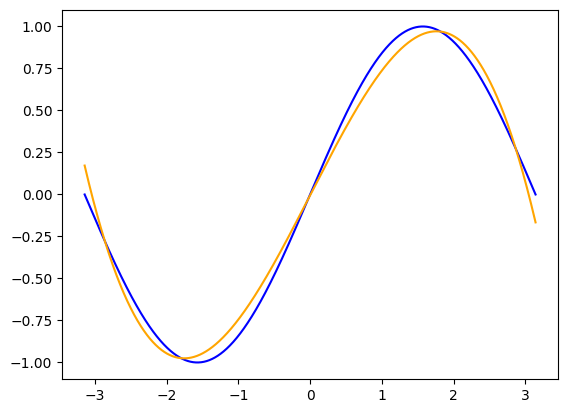

In [29]:
# -*- coding: utf-8 -*-

# import torch
import numpy as np
import math
import matplotlib.pyplot as plt

dtype = np.float64

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = np.sin(x)

plt.plot(x, y, 'blue')

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = ((y_pred - y) ** 2).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    # d/da (y_pred - y)²
    # 2 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    
    # d/db (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x
    grad_b = (grad_y_pred * x).sum()

    # d/dc (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x²
    grad_c = (grad_y_pred * x ** 2).sum()

    # d/dd (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x³
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plt.plot(x, y_pred, 'orange')

%reset -f

## PyTorch

99 1299.2640380859375
199 867.3404541015625
299 580.2083740234375
399 389.2626037597656
499 262.23577880859375
599 177.69873046875
699 121.41619110107422
799 83.92851257324219
899 58.948204040527344
999 42.294517517089844
1099 31.186233520507812
1199 23.773094177246094
1299 18.82307243347168
1399 15.515874862670898
1499 13.304944038391113
1599 11.825896263122559
1699 10.835861206054688
1799 10.172662734985352
1899 9.728102684020996
1999 9.429862976074219
Result: y = -0.013287296518683434 + 0.8360028862953186 x + 0.0022922796197235584 x^2 + -0.09038059413433075 x^3


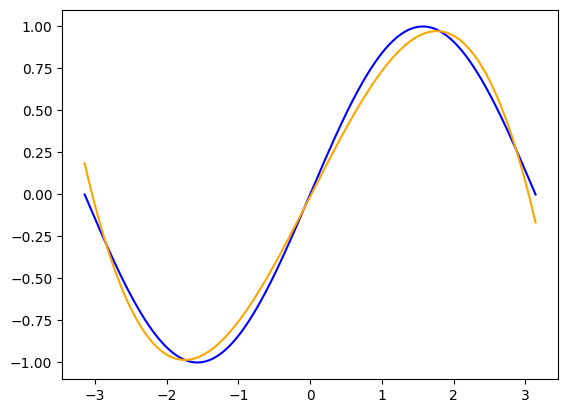

In [30]:
# -*- coding: utf-8 -*-

import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("mps") # Uncomment this to run on GPU Apple Silicon
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

plt.plot(x, y, 'blue')

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    # d/da (y_pred - y)²
    # 2 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    
    # d/db (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x
    grad_b = (grad_y_pred * x).sum()

    # d/dc (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x²
    grad_c = (grad_y_pred * x ** 2).sum()

    # d/dd (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x³
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plt.plot(x, y_pred, 'orange')

%reset -f